<a href="https://colab.research.google.com/github/nyamskamau/Housing-Price-Prediction-Dataset-Week-7/blob/main/Housing_Price_Prediction_Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Independent Project - Week 7** 

> **1. Defining the Question**
* Hass Consulting Company , a real estste company , would like to investigate the factors that affect housing prices using the given information on real estate properties that was collected over some months.
* The company would then like to predict the sale price of Houses upon being provided with the predictor variables.


> **2. Metric for Success**
* The metric for success for this analysis for the company  would be to determine the exact features that influence the price of a house and to predict the sale prices.
* Ideally as a researcher while building my model, the metric of success will be measured by the Coefficient of Determination.
I would like to obtain an r2_score of 0.80 or above while evaluating the performance of my model.

> **3. Experimental Design Taken**
* This first step of this analysis will be loading the dataset , the appropriate libraries and  then taking the necessary steps to clean the data.
* Next I will carry out Univariate and Bivariate data analysis while dealing with the outliers found within my dataset,
* Finally I will build several models:
    * Multiple Linear Regression
    * Quantile Regression
    * Ridge Regression
    * Lasso Regression
    * Elastic Net Regression
* And evaluate their performance on the dataset at hand and then provide  observations and recommendations on the suitability of each of the tested models on their appropriateness of solving the given problem. 

> **4. Exploring the Dataset**
* The Dataset given has 20 columns , with the dependent variable being the Price of the house and the other variables being the features.
* The descriptions for these columns is provided below.

> **5. The appropriateness of the available data to answer the given question**
* Given the objectives of my analysis the Data available is appropriate.

## **1**. **Loading The Data**

### **1.1.Loading the Dataset and the Appropriate Libraries**

> * The first step I undertook in this analysis was loading the dataset onto my notebook and importing the libraries.
* Next I previewed the dataset and obtained information on the datatypes of the columns given and gave a detailed description of all the columns given in the dataset.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn import linear_model

In [ ]:
df = pd.read_csv('Housedata.csv')

In [ ]:
df.shape

(21613, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [ ]:
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.00000,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
21609,6600060120,400000.00000,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
21610,1523300141,402101.00000,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007
21611,291310100,400000.00000,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287
21612,1523300157,325000.00000,2,0.75000,1020,1076,2.00000,0,0,3,7,1020,0,2008,0,98144,47.59410,-122.29900,1020,1357


The desciptions of the columns found in the Dataset were: 

>* Id 
>* price  - Price of the house
>* bedrooms - Number of Bedrooms
>* bathrooms - Number of Bathrooms
>* sqft_living - Square feet area of living area
>* sqft_lot  - Square feet area of parking Layout
>* floors - Number of Floors
>* waterfront - Whether waterfront is there or not
>* view - Number of Views
>* grade - Grades
>* sqft_above - Square feet of the area above the basement.
>* sqft_basement - Square feet area of the basement
>* yr_built - Year the house is built
>* yr_renovated - Year the house is renovated
>* zipcode - zipcode os the house
>* lat : Latitude of the house
>* lon : Longitude of the house
>* sqft_living15
>* sqft_lot15

### **1.2.Data Cleaning**

The next step I undertook was cleaning the dataset and checking the appropriateness of the columns given in the analysis.

#### 1.2.1.Validity

>* I checked for the relevance of the columns given in the dataset in my analysis.
>*  As majority of the houses in the dataset did not have a Waterfront I also dropped this column from my dataset.
>* Similarly majority of the houses had not been renovated and hence this column was also dropped.

In [ ]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [ ]:
df.yr_renovated.value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
df.drop(['id','yr_renovated'],axis=1,inplace=True)

####1.2.2.Accuracy

>* Checking that the data in the columns was correct.
>* In the bedrooms column some entries were recorded as having zero bedrooms.
 

In [ ]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
df.bathrooms.value_counts()

2.50000    5380
1.00000    3852
1.75000    3048
2.25000    2047
2.00000    1930
1.50000    1446
2.75000    1185
3.00000     753
3.50000     731
3.25000     589
3.75000     155
4.00000     136
4.50000     100
4.25000      79
0.75000      72
4.75000      23
5.00000      21
5.25000      13
0.00000      10
5.50000      10
1.25000       9
6.00000       6
0.50000       4
5.75000       4
8.00000       2
6.25000       2
6.50000       2
6.75000       2
7.50000       1
7.75000       1
Name: bathrooms, dtype: int64

#### 1.2.3.Completeness
>* I then checked whether there were any missing values in the Dataset.

In [ ]:
df.isnull().sum().sum()

0

#### 1.2.4.Consistency
>* I checked for duplicated entries in the dataset.
Seeing as there were three I opted to dropped these from the dataset.

In [ ]:
df.duplicated().sum()

5

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

#### 1.2.5.Uniformity.

>* Seeing as the columns were all named correctly , and of the right data type I proceeded to carry out EDA.

## **2.Exploratory Data Analysis**

###2.1.Univariate Analysis.

> The Price Variable

In [ ]:
pd.options.display.float_format = '{:.5f}'.format

>* Obtaining the mean, mode ,median and range for the column

In [ ]:
df['price'].describe()

count     21608.00000
mean     540192.40781
std      367399.63434
min       75000.00000
25%      321837.50000
50%      450000.00000
75%      645000.00000
max     7700000.00000
Name: price, dtype: float64

In [ ]:
a=df['price'].max()
b=df['price'].min()
range = a-b
range

7625000.0

>* Plotting a boxplot and histogram for the column 

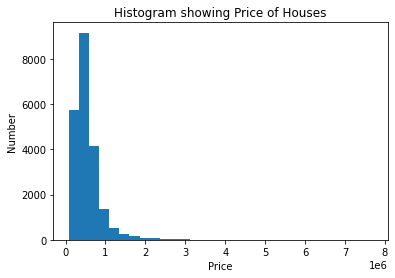

In [ ]:
df1 =df['price']
plt.hist(df1, bins=30, histtype='bar', rwidth=2)

plt.xlabel('Price')
plt.ylabel('Number')
plt.title('Histogram showing Price of Houses') 
plt.show()


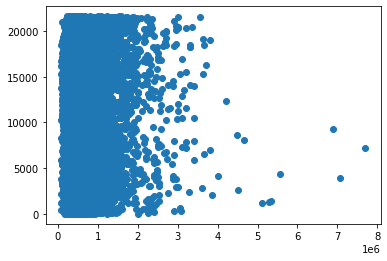

In [ ]:
plt.scatter(df.price,df.index)

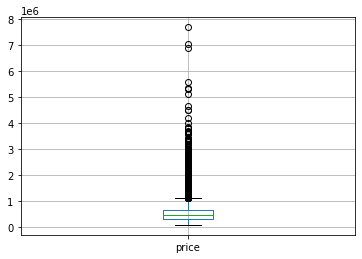

In [ ]:
df.boxplot('price')

>* Checking for outliers in the column.

In [ ]:
Q1 = df[['price']].quantile(0.25)
Q3 = df[['price']].quantile(0.75)
IQR = Q3 - Q1
((df[['price']]<(Q1 - 1.5*IQR))|(df[['price']]>(Q3 + 1.5 *IQR))).value_counts()

price
False    20449
True      1159
dtype: int64

>* The mean price of the houses was  540,82 while the minimum price 75,000 and the maximum price was 7,700,000.
>* The range of the variable is 7,625,000 which is very high.
>* The column also had a number of outliers which I opted not to drop here, given that they would be used in Building the models.

Grade Variable.

In [ ]:
df.grade.describe()

count   21608.00000
mean        7.65665
std         1.17548
min         1.00000
25%         7.00000
50%         7.00000
75%         8.00000
max        13.00000
Name: grade, dtype: float64

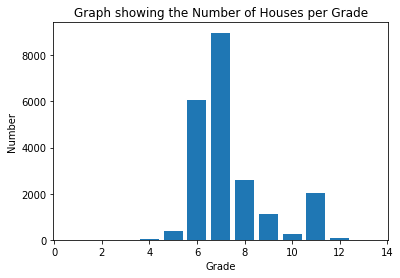

In [ ]:
labels=df.grade.unique()
plt.bar(labels , df['grade'].value_counts())
plt.ylabel("Number")
plt.xlabel("Grade")
plt.title("Graph showing the Number of Houses per Grade")
plt.show()

>* Majority of the Houses were given a grade of 7 whereas these grades ranged from 1-13.

View Variable

In [ ]:
df.view.describe()

count   21608.00000
mean        0.23422
std         0.76617
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         4.00000
Name: view, dtype: float64

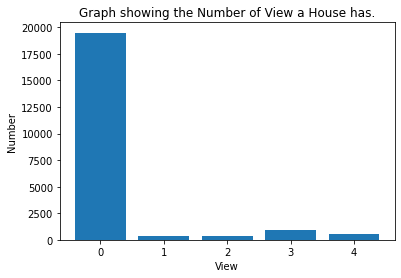

In [ ]:
labels=df.view.unique()
plt.bar(labels , df['view'].value_counts())
plt.ylabel("Number")
plt.xlabel("View")
plt.title("Graph showing the Number of View a House has.")
plt.show()

In [ ]:
df.view.value_counts()

0    19485
2      963
3      509
1      332
4      319
Name: view, dtype: int64

In [ ]:
df.view.replace({2:1,
                 3:1,
                 4:1},inplace=True)

>* Majority of the Houses did not have a View 

The Location Factor.

>* The dataset has  Latitude , Longitude and Zipcode Columns.   These columns help us identify the location of the Houses.
>* Rather than adding them to my dataset as features , I opted to first find the respective Cities, using Zipcodes and factor these in as my location variable.
>* Therefore I found the Cities within which the Houses were located then encoded them and used these as my Feature.


In [ ]:
!pip install uszipcode


In [ ]:
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search = SearchEngine()

def zco(x):
    city = search.by_zipcode(x).major_city
    return city if city else 'None'

df['metro'] = df['zipcode'].apply(zco)

In [ ]:
df.drop(['lat','long','zipcode'],axis=1,inplace=True)

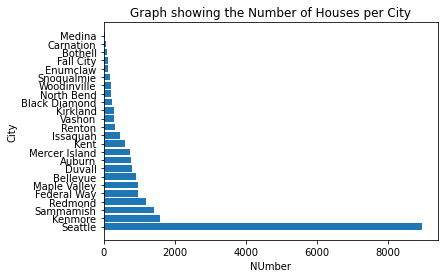

In [ ]:
labels=df.metro.unique()
plt.barh(labels , df['metro'].value_counts())
plt.ylabel("City")
plt.xlabel("NUmber")
plt.title("Graph showing the Number of Houses per City")
plt.show()

>* Majority of the Houses within the dataset were in the Seattle area.

The bedrooms variable

In [ ]:
df.bedrooms.describe()

count   21608.00000
mean        3.37093
std         0.93010
min         0.00000
25%         3.00000
50%         3.00000
75%         4.00000
max        33.00000
Name: bedrooms, dtype: float64

In [ ]:
df.drop(df[df.bedrooms == 33].index, inplace=True)

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,metro
0,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,1340,5650,Seattle
1,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1690,7639,Seattle
2,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,2720,8062,Kenmore
3,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,1360,5000,Seattle
4,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.00000,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,2009,1530,1509,Seattle
21609,400000.00000,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,2014,1830,7200,Seattle
21610,402101.00000,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,2009,1020,2007,Seattle
21611,400000.00000,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,2004,1410,1287,Issaquah


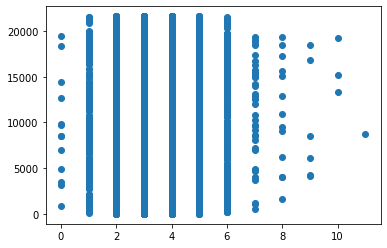

In [ ]:
plt.scatter(df.bedrooms,df.index)

>* Majority of the Houses had bedrooms ranging between two and five.
There was an extreme outlier with one house having 33 bedrooms

The Bathrooms Variable

In [ ]:
df.bathrooms.describe()

count   21607.00000
mean        2.11475
std         0.77025
min         0.00000
25%         1.75000
50%         2.25000
75%         2.50000
max         8.00000
Name: bathrooms, dtype: float64

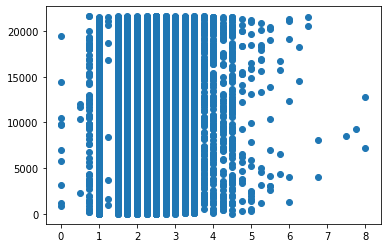

In [ ]:
plt.scatter(df.bathrooms,df.index)

>* Majority of the houses had between 1 and 5 bathrooms. 
With some having zero and others on the other end with 8 baths.

### 2.2.Bivariate Analysis.

Text(0, 0.5, 'City')

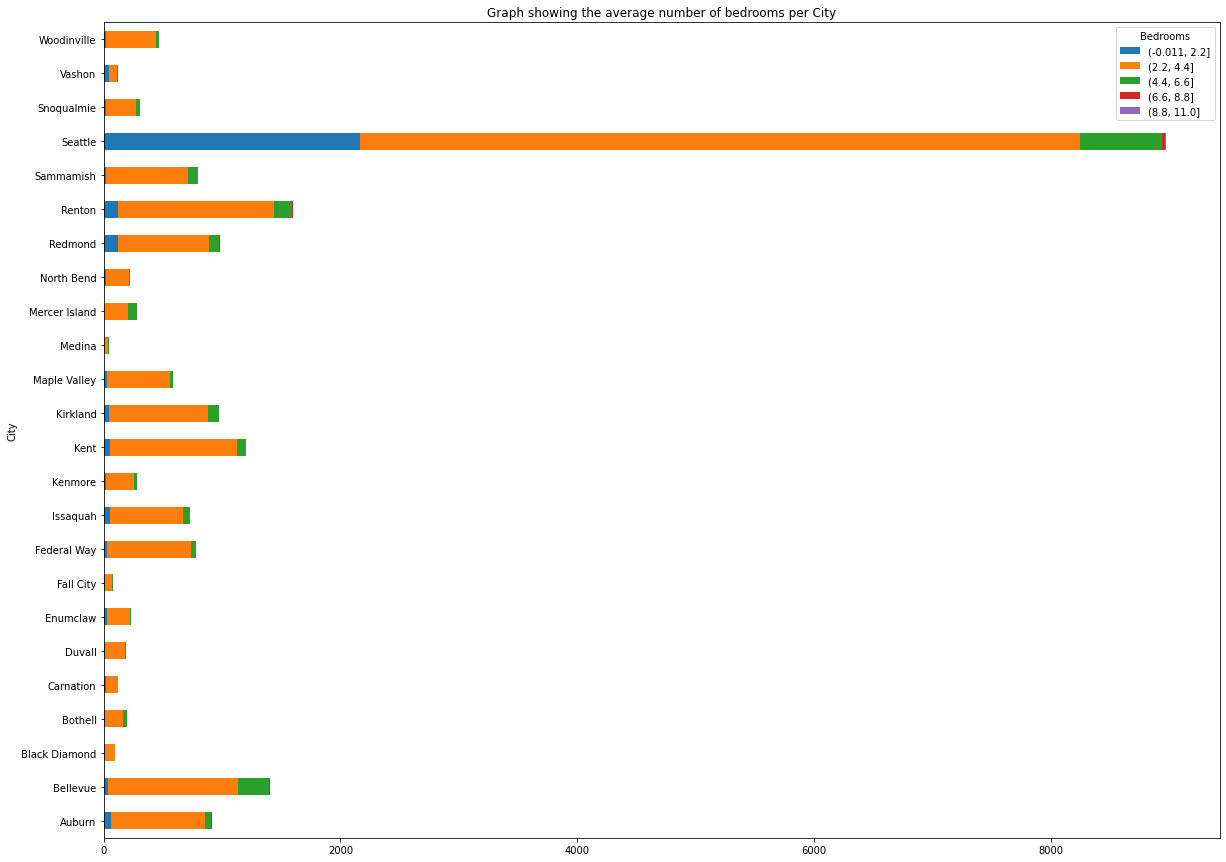

In [ ]:
df['Bedrooms'] = pd.cut(x=df['bedrooms'], bins=5)
Houses = df.groupby(['metro', 'Bedrooms'])['metro'].count().unstack('Bedrooms')
ax = Houses.plot.barh(stacked=True, edgecolor='none',figsize=(20,15))
plt.title('Graph showing the average number of bedrooms per City')
plt.ylabel('City')


Text(0, 0.5, 'City')

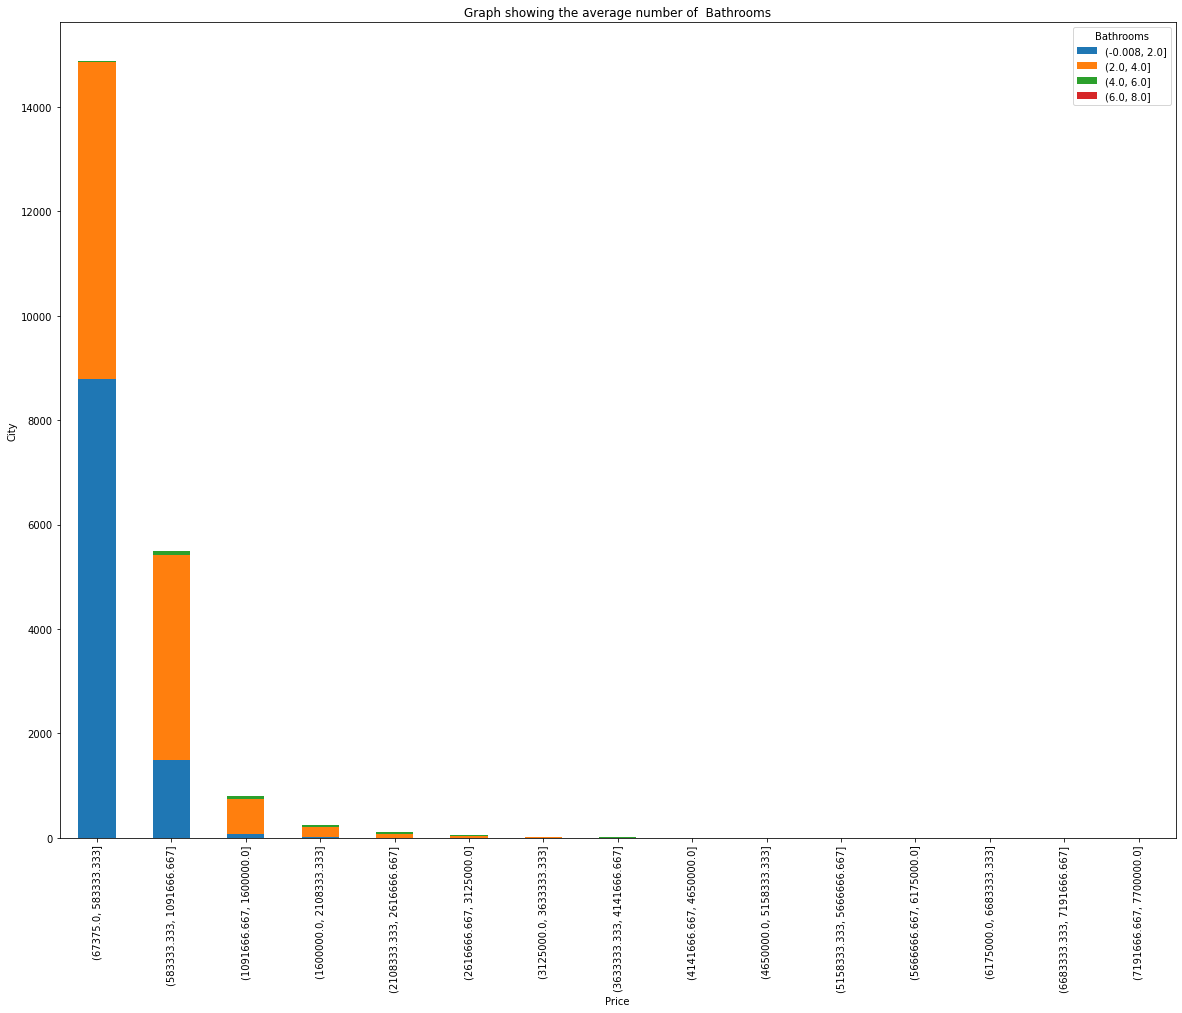

In [ ]:
df['Bathrooms'] = pd.cut(x=df['bathrooms'], bins=4)
Houses = df.groupby(['Price', 'Bathrooms'])['Price'].count().unstack('Bathrooms')
ax = Houses.plot.bar(stacked=True, edgecolor='none',figsize=(20,15))
plt.title('Graph showing the average number of  Bathrooms')
plt.ylabel('City')

Text(0, 0.5, 'City')

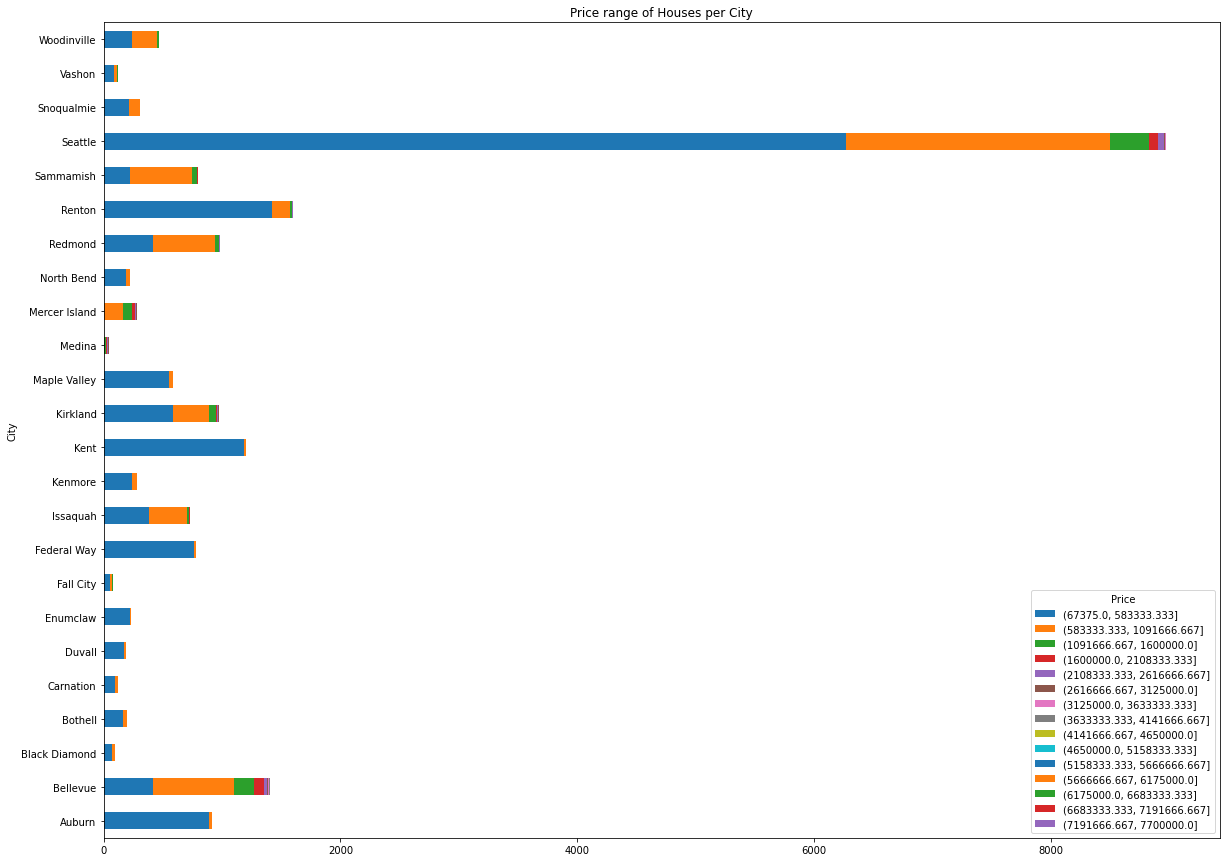

In [ ]:
df['Price'] = pd.cut(x=df['price'], bins=15)
Countries = df.groupby(['metro', 'Price'])['metro'].count().unstack('Price')
ax = Countries.plot.barh(stacked=True, edgecolor='none',figsize=(20,15))
plt.title('Price range of Houses per City')
plt.ylabel('City')


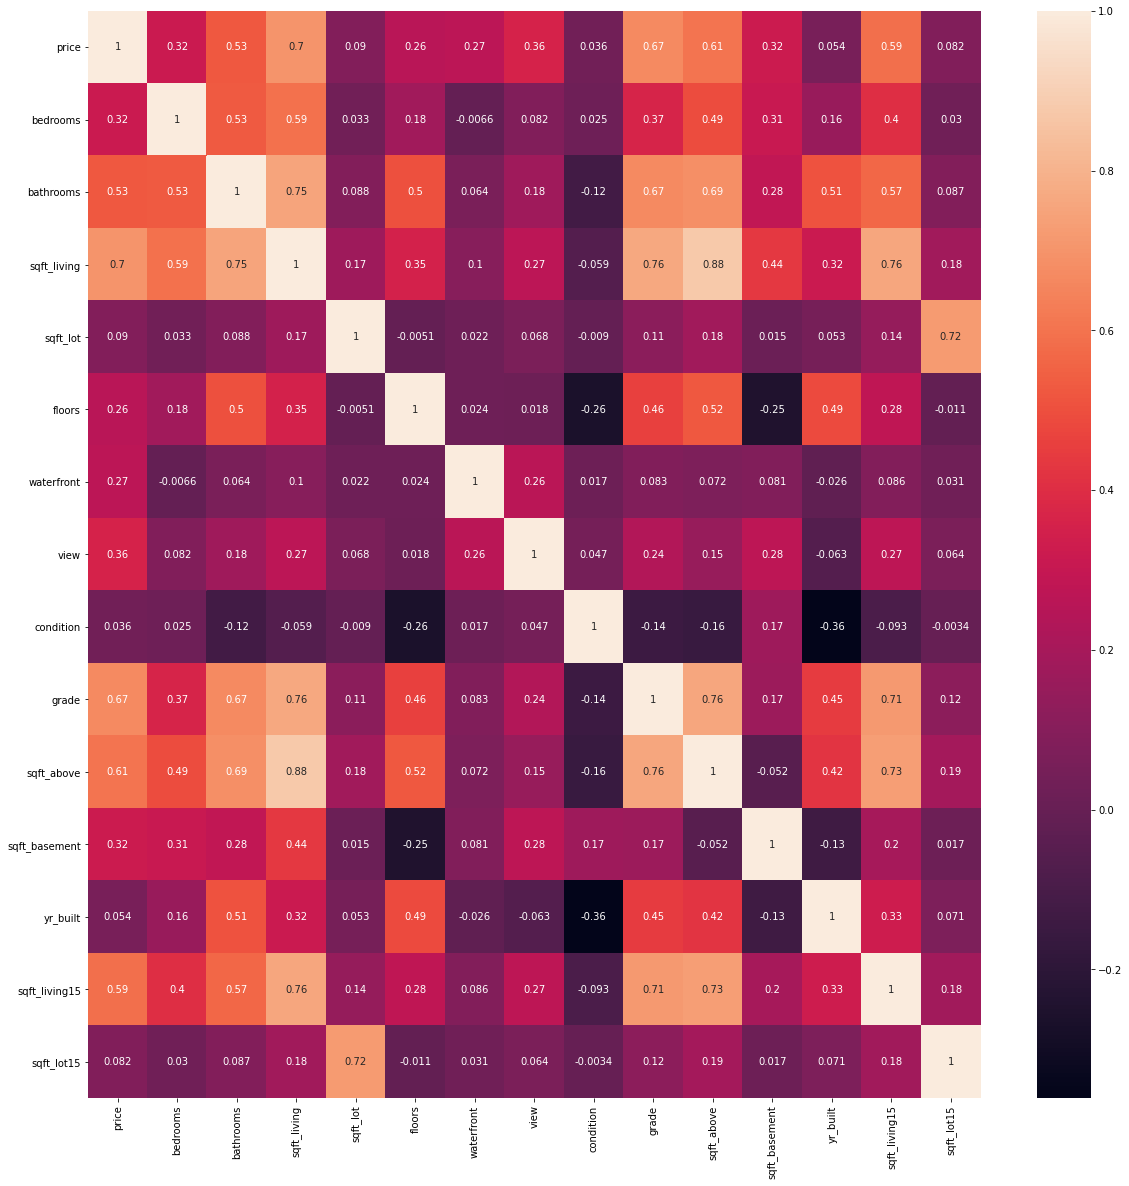

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

>* The Price variable was highly correlated with the 
>    * Bathroom variable
>    * sqft_living variable
>    * grade
>    * sqft_above vaiable
>* It was also correlated though to a lesser degree with the :
>    * Bedrooms
>    * sqft_basement 
>    * floors
>    * view

##  **3.Analysis**

### 3.1.Linear Regression Model.

>* The first model I implemented was the Multiple Linear Regression Model.
>* However this model has limitations.
>  * It is sensitive to outliers as they affect the regression line and the forecasted values.
>  * Multicollinearity in a LInear Regression Model increases the variance of the coefficients and makes the estimates senstive to minor changes.
>  * These models also have the assumption of homoskedasticity,constant variance.
>  * They are complex and fit the training data too well , hence overfitting .

>* Therefore in order for us to fit a Linear Regression Model we will first check for Multicolinearity using the VIF and then test for Homoskedasticity once we fit the model.


>* The first step would be to identify the feeatures and the target variable.
>* Then test for multicollinearity within the model and then drop the features with a high VIF score.

#### Features

In [ ]:
#df= df[~((df[['price']]<(Q1 - 1.5*IQR))|(df[['price']]>(Q3 + 1.5 *IQR))).any(axis=1)]

In [ ]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['metro'] = le.fit_transform(df['metro'])
df['yr_built'] = le.fit_transform(df['yr_built'])

In [ ]:
x = df.drop(['price'],axis=1)
y = df.price

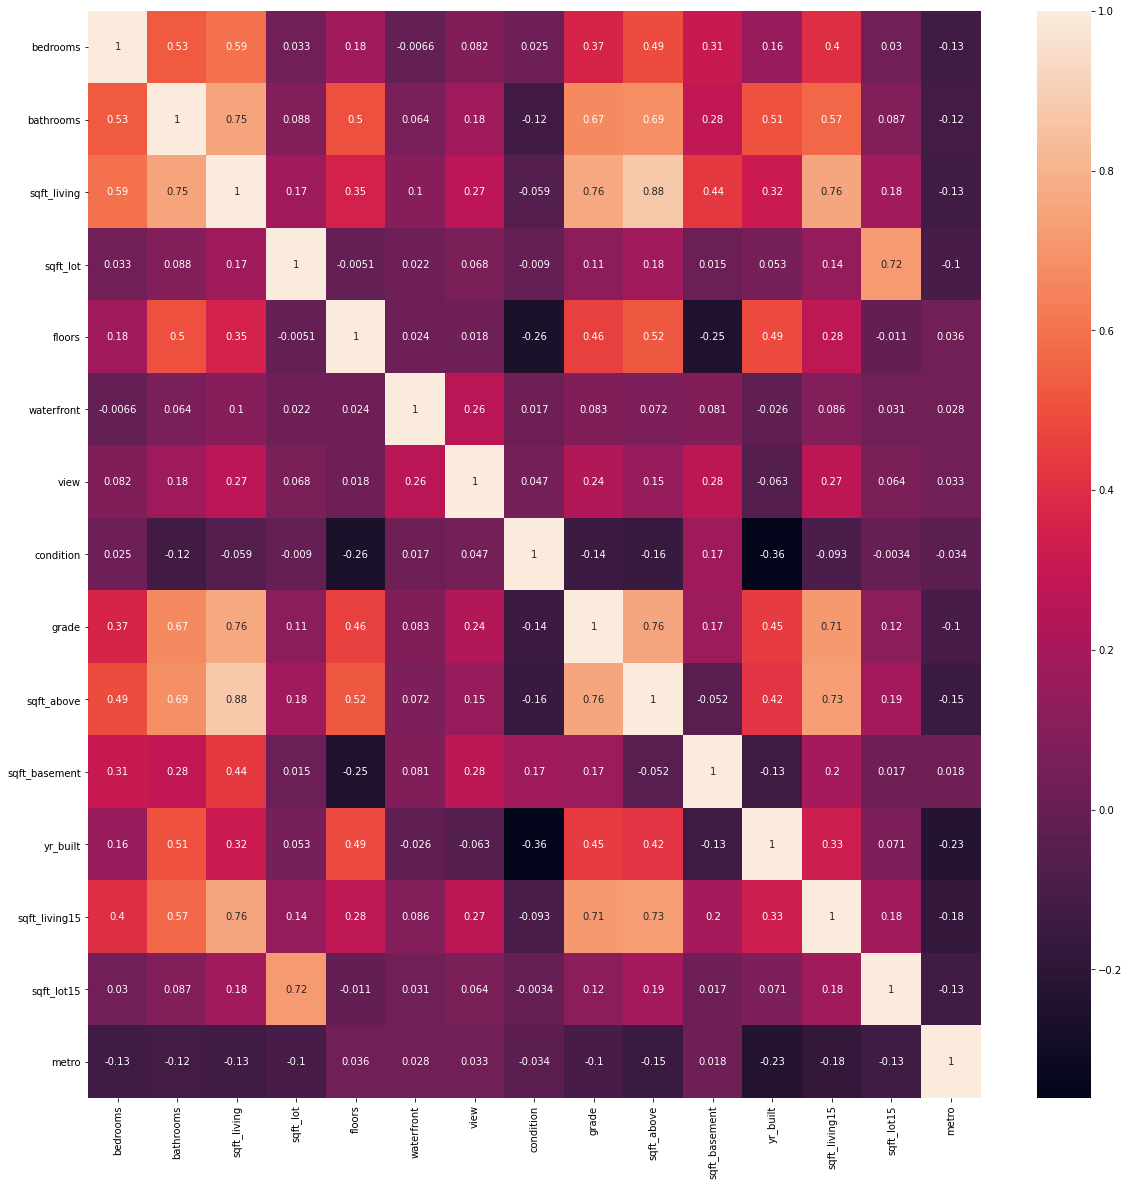

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(x.corr(),annot=True)

>* The sqft_living variable was highly correlated with:
>    * bedrooms
>    * bathrooms
>    * grade
>    * sqft_above
>    * sqft_living15

>* Similarly the other variables in the dataset are also very highly correlated with each other.
>* Therefore I opted to find the VIF score for the variables and eliminate those with high multicollinearity from my dataset. 

In [ ]:
correlations = x.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,metro
bedrooms,1.70662,-0.47963,-0.75800,0.04913,0.05263,0.08551,0.11247,-0.05730,0.34188,-0.24504,-0.14114,0.11571,0.02227,0.09499,0.10719
bathrooms,-0.47963,3.30110,-3.25833,-0.01757,-0.69380,-0.01307,-0.05190,-0.09398,-0.30492,1.69563,0.49919,-0.81435,0.11364,0.06696,-0.01049
sqft_living,-0.76134,-3.26450,-27605332292168.28516,-0.03842,1.63511,-0.23883,-0.07898,0.19890,-0.99628,24889132135670.51172,13302493611756.38867,0.69929,-1.58892,-0.08527,-0.24427
sqft_lot,0.04913,-0.01757,-0.03581,2.08802,0.07025,0.02008,-0.04427,0.01907,-0.00756,-0.20421,-0.00823,0.02769,0.12827,-1.47308,0.01914
floors,0.05263,-0.69380,1.63684,0.07025,1.98745,-0.01446,-0.04800,0.11300,-0.30806,-1.93381,-0.20772,-0.35923,0.32512,0.08263,-0.26044
waterfront,0.08551,-0.01307,-0.23929,0.02008,-0.01446,1.08247,-0.26777,-0.00673,0.01708,0.10548,0.06825,0.03185,0.02169,-0.02007,-0.01510
view,0.11247,-0.05190,-0.07887,-0.04427,-0.04800,-0.26777,1.25751,-0.00245,-0.15647,0.11717,-0.20926,0.20007,-0.26057,0.00317,-0.03244
condition,-0.05730,-0.09398,0.19952,0.01907,0.11300,-0.00673,-0.00245,1.20280,-0.01991,-0.13672,-0.17934,0.43270,0.04075,-0.02407,0.13057
grade,0.34188,-0.30492,-0.99536,-0.00756,-0.30806,0.01708,-0.15647,-0.01991,3.24377,-0.60964,-0.08022,-0.40485,-0.84158,0.11408,-0.08878
sqft_above,-0.24333,1.69944,24889132135670.50391,-0.20152,-1.93109,0.10505,0.11677,-0.13636,-0.60777,-22440189884708.50781,-11993607529615.19141,-0.25665,-0.16780,-0.13678,0.28442


>* The VIF scores for the sqft_living , sqft_basement and sqft_above variables was very high.
>* Therefore I opted to drop the sqft_above variables and then check the VIF score for the remaining variables.

In [ ]:
x = x.drop(['sqft_above'],axis=1)

>* I then checked the VIF once more an noting that the sqft_living variable was still higher than 3 . I then dropped iy from my model.

In [ ]:
correlations = x.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15,metro
bedrooms,1.72455,-0.43802,-1.10253,0.04830,0.09089,0.03750,0.09111,-0.04951,0.27859,0.01205,0.13466,0.09535,0.10237,0.11540
bathrooms,-0.43802,2.98226,-1.07719,-0.02120,-0.70070,-0.02395,-0.04581,-0.10237,-0.23107,-0.42769,-0.82828,0.06868,0.07631,0.00421
sqft_living,-1.10253,-1.07719,5.22920,-0.21302,-0.54677,-0.02990,0.06061,0.01487,-1.23229,-1.22539,0.30593,-1.79213,-0.21901,0.03050
sqft_lot,0.04830,-0.02120,-0.21302,2.03024,0.06599,0.00296,-0.04630,0.01786,0.00159,0.08731,0.03732,0.08614,-1.41516,0.02732
floors,0.09089,-0.70070,-0.54677,0.06599,2.04109,-0.01507,-0.03957,0.13367,-0.28159,0.84873,-0.37305,0.37146,0.07757,-0.25123
waterfront,0.03750,-0.02395,-0.02990,0.00296,-0.01507,1.04224,-0.20208,-0.00710,0.04827,0.02964,0.02039,0.01392,-0.02863,-0.02559
view,0.09111,-0.04581,0.06061,-0.04630,-0.03957,-0.20208,1.14699,0.00080,-0.08991,-0.22200,0.17189,-0.23281,-0.00602,-0.03905
condition,-0.04951,-0.10237,0.01487,0.01786,0.13367,-0.00710,0.00080,1.20022,-0.02252,-0.09270,0.41826,0.06643,-0.02243,0.13869
grade,0.27859,-0.23107,-1.23229,0.00159,-0.28159,0.04827,-0.08991,-0.02252,2.70510,0.19829,-0.42603,-0.70113,0.07781,-0.10302
sqft_basement,0.01205,-0.42769,-1.22539,0.08731,0.84873,0.02964,-0.22200,-0.09270,0.19829,1.81862,0.15057,0.47690,0.04862,-0.13549


In [ ]:
x = x.drop('sqft_living',axis=1)

>* After this I used the remaining variables in my model to fit a Multiple Linear Regression Model.

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20448 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       20448 non-null  int64  
 1   bathrooms      20448 non-null  float64
 2   sqft_lot       20448 non-null  int64  
 3   floors         20448 non-null  float64
 4   waterfront     20448 non-null  int64  
 5   view           20448 non-null  int64  
 6   condition      20448 non-null  int64  
 7   grade          20448 non-null  int64  
 8   sqft_basement  20448 non-null  int64  
 9   yr_built       20448 non-null  int64  
 10  sqft_living15  20448 non-null  int64  
 11  sqft_lot15     20448 non-null  int64  
 12  metro          20448 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 2.2 MB


#### Fitting a Linear Model

In [ ]:
regression=LinearRegression()
regression.fit(x,y)
y_pred=regression.predict(x)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 104692.7381660349
Mean Squared Error: 18169964820.287426
Root Mean Squared Error: 134796.0118856913


In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 39640.70225835061,
 'bedrooms': -2899.9086267664647,
 'condition': 21697.715270412722,
 'floors': 54788.80231788704,
 'grade': 98969.05359164895,
 'metro': 2953.080144133702,
 'sqft_basement': 51.63371943800621,
 'sqft_living15': 85.2048057888669,
 'sqft_lot': 0.19064919789525447,
 'sqft_lot15': -0.13161946239415556,
 'view': 43453.743963234556,
 'waterfront': 101961.76956950543,
 'yr_built': -2512.753891628406}

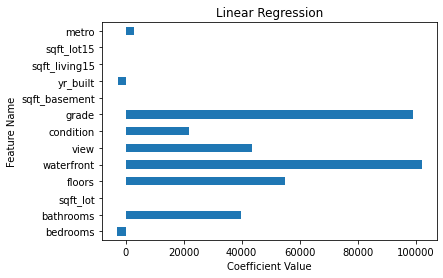

In [ ]:
lr = LinearRegression()
models = [(lr, 'Linear Regression')]
for model in models:
    model[0].fit(x, y)
    pd.Series(model[0].coef_, 
              index=x.columns).plot(kind='barh')
    plt.title(model[1])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.show()

>* From my features , The grade feature was the highest with a value of 102535.5496 and the RMSE for the model was 134906.
Which is a high value.

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y, y_pred)
score

0.5794618133907719

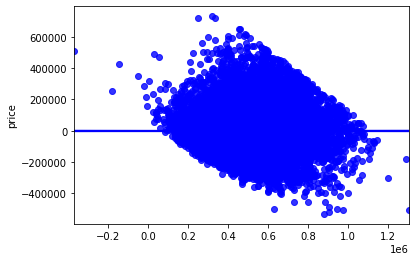

In [ ]:
residual = y - y_pred
sns.regplot(x = y_pred , y=residual, data = df , color = 'blue')


>* The r2_score for the model was 0.578 which is low as I had hoped for an r2 score higher than .70 while evaluating my model.
>* Plotting my residuals against the fitted values , I noted that 

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result,p_value)
print(critical_value)

523.0448681820744 9.20649202190349e-116
inf


In [ ]:
residuals = y - y_pred

>* Testing for Heteroskedasticity of the model using the Barlett test, I noted that the p-value for the model was very low and the 

>* Dividing the model into a training and test set to see how well it makes predictions, the model was 

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = .30, random_state = 180)
regr = LinearRegression()
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted})
df2.describe()

,Actual,Predicted
count,6135.00000,6135.00000
mean,476629.10285,473142.00643
std,208492.84045,157079.59913
min,78000.00000,-145176.76801
25%,315000.00000,361719.54496
50%,437000.00000,458187.74306
75%,602000.00000,565408.64360
max,1120000.00000,1135588.52146


Text(0, 0.5, 'Predicted prices')

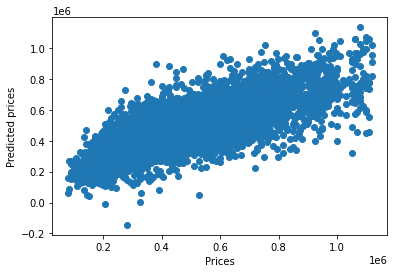

In [ ]:
plt.scatter(Y_test, predicted)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

In [ ]:

y_pred1= regr.predict(X_train)
y_pred2 = regr.predict(X_test)
RMSEtrain = mean_squared_error(Y_train, y_pred1)**0.5
RMSEtest = mean_squared_error(Y_test, y_pred2)**0.5
r2_train = r2_score(Y_train, y_pred1)
r2_test = r2_score(Y_test, y_pred2)
print( "RMSE for the training data is: ", RMSEtrain)
print ("RMSE for the testing data is: ", RMSEtest)
print ("R^2 value for training data is: ", r2_train)
print ("R^2 value for testing data is: ", r2_test)

RMSE for the training data is:  134233.30173649013
RMSE for the testing data is:  136142.9207474019
R^2 value for training data is:  0.5819049009120031
R^2 value for testing data is:  0.5735396782095106


### 3.2.Quantile 

>* Quantile Regression works better with data that has Heteroskedasticity , outliers and high skewness.
>* The coefficients obtained from this model should differ significant;y with those obtained when carrying out Multiple Linear Regression.

In [ ]:
correlations = x.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15,metro
bedrooms,1.52928,-0.71688,0.00408,-0.03451,0.06447,0.12116,-0.04911,0.05462,-0.23908,0.18701,-0.28299,0.05424,0.11943
bathrooms,-0.71688,2.98370,-0.07784,-0.81038,-0.04121,-0.04027,-0.08302,-0.68922,-0.71479,-0.71895,-0.29474,0.01244,0.00589
sqft_lot,0.00408,-0.07784,2.07658,0.04812,0.01474,-0.04206,0.02115,-0.08053,0.04235,0.04581,0.05073,-1.48343,0.02225
floors,-0.03451,-0.81038,0.04812,1.94463,-0.02479,-0.04373,0.11703,-0.44921,0.71229,-0.32419,0.17512,0.06260,-0.25442
waterfront,0.06447,-0.04121,0.01474,-0.02479,1.07997,-0.26674,-0.00576,-0.01699,-0.01534,0.04030,-0.01452,-0.02490,-0.01365
view,0.12116,-0.04027,-0.04206,-0.04373,-0.26674,1.25709,-0.00285,-0.14239,-0.26043,0.19657,-0.24561,0.00516,-0.03304
condition,-0.04911,-0.08302,0.02115,0.11703,-0.00576,-0.00285,1.20242,-0.00664,-0.09553,0.42940,0.05486,-0.02219,0.13000
grade,0.05462,-0.68922,-0.08053,-0.44921,-0.01699,-0.14239,-0.00664,2.77847,-0.12716,-0.28935,-1.33604,0.04806,-0.06894
sqft_basement,-0.23908,-0.71479,0.04235,0.71229,-0.01534,-0.26043,-0.09553,-0.12716,1.58676,0.22668,0.03683,0.01451,-0.11297
yr_built,0.18701,-0.71895,0.04581,-0.32419,0.04030,0.19657,0.42940,-0.28935,0.22668,1.90049,0.01489,-0.05277,0.36234


>* Once again checking for Multicollinearity, the VIF for the features is low and therefore we use these to carry out Quantile regression.

>* 1. Model 1 : The 0.5 Quantile , Median regression model

In [ ]:
import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ x', data= df,)
res = mod.fit(q=0.5)
quantile = res.summary()
quantile

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.3907
Model:                       QuantReg   Bandwidth:                   2.372e+04
Method:                 Least Squares   Sparsity:                    3.441e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21607
Time:                        14:25:27   Df Residuals:                    21593
                                        Df Model:                           13
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.835e+05   1.27e+04    -53.790      0.000   -7.08e+05   -6.59e+05
x[0]       -9705.5278   1593.884     -6.089      0.000   -1.28e+04   -6581.396
x[1]         4.86e+04   2624.533     18.518      0.000    4.35e+04    5.37e+04
x[2]           0.2532      0.041      6.219      0.000       0.173       0.333
x[3]        6.134e+04   3022.755     20.294      0.000    5.54e+04    6.73e+04
x[4]        5.778e+05   1.41e+04     41.110      0.000     5.5e+05    6.05e+05
x[5]        7.168e+04   4408.197     16.260      0.000     6.3e+04    8.03e+04
x[6]        2.237e+04   1972.197     11.343      0.000    1.85e+04    2.62e+04
x[7]        1.197e+05   1659.536     72.111      0.000    1.16e+05    1.23e+05
x[8]          69.6454      3.331     20.910      0.000      63.117      76.174
x[9]       -3040.7731     54.930    -55.357      0.000   -3148.440   -2933.106
x[10]         94.8435      2.597     36.520      0.000      89.753      99.934
x[11]         -0.2128      0.062     -3.416      0.001      -0.335      -0.091
x[12]       2417.1896    185.906     13.002      0.000    2052.801    2781.579
==============================================================================

The condition number is large, 6.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>* 2. Model 2: The 75 Percentile model.

In [ ]:
import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ x', data= df,)
res = mod.fit(q=0.75)

quantile = res.summary()
quantile

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.4406
Model:                       QuantReg   Bandwidth:                   2.222e+04
Method:                 Least Squares   Sparsity:                    4.713e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21607
Time:                        14:26:54   Df Residuals:                    21593
                                        Df Model:                           13
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.054e+05   1.62e+04    -43.653      0.000   -7.37e+05   -6.74e+05
x[0]       -1.066e+04   1962.828     -5.432      0.000   -1.45e+04   -6815.279
x[1]        6.573e+04   3281.061     20.032      0.000    5.93e+04    7.22e+04
x[2]           0.2885      0.049      5.938      0.000       0.193       0.384
x[3]        5.874e+04   3713.895     15.815      0.000    5.15e+04     6.6e+04
x[4]        2.691e+05   2.17e+04     12.411      0.000    2.27e+05    3.12e+05
x[5]        1.306e+05   4983.517     26.198      0.000    1.21e+05     1.4e+05
x[6]        1.917e+04   2373.176      8.076      0.000    1.45e+04    2.38e+04
x[7]        1.411e+05   2182.591     64.626      0.000    1.37e+05    1.45e+05
x[8]          84.8316      4.135     20.514      0.000      76.726      92.937
x[9]       -3654.5738     69.101    -52.887      0.000   -3790.017   -3519.130
x[10]         99.7343      3.416     29.198      0.000      93.039     106.430
x[11]         -0.3309      0.079     -4.172      0.000      -0.486      -0.175
x[12]        744.3899    224.140      3.321      0.001     305.058    1183.721
==============================================================================

The condition number is large, 6.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>* 3. Model 3: The 25th Percentile Model.

In [ ]:
import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ x', data= df,)
res = mod.fit(q=0.25)

quantile = res.summary()
quantile

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.3281
Model:                       QuantReg   Bandwidth:                   2.086e+04
Method:                 Least Squares   Sparsity:                    3.482e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21607
Time:                        14:56:31   Df Residuals:                    21593
                                        Df Model:                           13
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.327e+05   1.08e+04    -58.842      0.000   -6.54e+05   -6.12e+05
x[0]       -8498.7959   1394.620     -6.094      0.000   -1.12e+04   -5765.238
x[1]        4.138e+04   2271.189     18.219      0.000    3.69e+04    4.58e+04
x[2]           0.1912      0.036      5.256      0.000       0.120       0.263
x[3]        5.185e+04   2599.215     19.948      0.000    4.68e+04    5.69e+04
x[4]        2.896e+05   1.23e+04     23.471      0.000    2.65e+05    3.14e+05
x[5]        4.915e+04   3942.456     12.467      0.000    4.14e+04    5.69e+04
x[6]        2.011e+04   1741.778     11.543      0.000    1.67e+04    2.35e+04
x[7]        9.871e+04   1366.367     72.246      0.000     9.6e+04    1.01e+05
x[8]          47.3652      2.886     16.414      0.000      41.709      53.021
x[9]       -2370.4691     45.775    -51.785      0.000   -2460.191   -2280.747
x[10]         84.9816      2.146     39.605      0.000      80.776      89.187
x[11]         -0.0584      0.055     -1.060      0.289      -0.166       0.050
x[12]       4217.5891    157.116     26.844      0.000    3909.631    4525.547
==============================================================================

The condition number is large, 6.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>* The Quantile Regression models also appear to not be the best models for this Prediction.
>* The models have very low R-squared values.

### 3.3.Lasso Regression Model.

>* The Lasso Regression Model penalizes less important features and acts as a shrinkage parameter and also does variable selection.
>* Fitting the model we have:

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(x)
lasso = linear_model.Lasso() 
lasso.fit(x, y) 
print("lasso score:", lasso.score(x, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(x))) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, lasso.predict(x))))
print("lasso coef:", lasso.coef_) 

lasso score: 0.6252745428164463
lasso MSE: 50581202999.94576
Root Mean Squared Error: 224902.65227414673
lasso coef: [-1.47522503e+04  9.30837298e+04  1.61554938e-01  4.88835676e+04
  6.81943969e+05  8.71288516e+04  1.77116951e+04  1.55350517e+05
  8.26374849e+01 -3.94814276e+03  9.15100520e+01 -3.18469128e-01
  5.53246357e+02]


In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 93083.72975290011,
 'bedrooms': -14752.250256986305,
 'condition': 17711.6951425435,
 'floors': 48883.56760530528,
 'grade': 155350.5173885647,
 'metro': 553.2463574881244,
 'sqft_basement': 82.6374848739967,
 'sqft_living15': 91.51005204703044,
 'sqft_lot': 0.16155493832666845,
 'sqft_lot15': -0.3184691281518487,
 'view': 87128.85162699831,
 'waterfront': 681943.9693993065,
 'yr_built': -3948.142757163327}

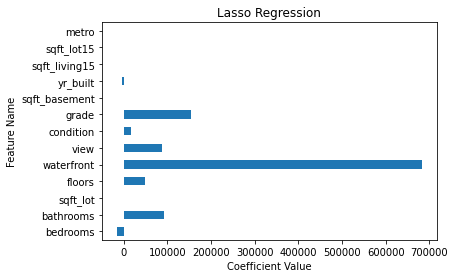

In [ ]:
lasso = Lasso()
models = [(lasso, 'Lasso Regression')]
for model in models:
    model[0].fit(x, y)
    pd.Series(model[0].coef_, 
              index=x.columns).plot(kind='barh')
    plt.title(model[1])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.show()

>* The model appears to place emphasis on the waterfront feature ultimately this may be due to the outliers in the dataset.


>* Dividing the model into a Test and Training set we then have :

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5000)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 1000, 5)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2',cv=20) 

gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 175.0}
lasso score: 0.6288345912584623
linear score: 0.628665887398494
lasso MSE: 49957087256.35124
linear MSE: 49979793988.32149
lasso best estimator coef: [-1.40717363e+04  9.35144774e+04  1.40665815e-01  4.62605373e+04
  6.82420411e+05  8.49534317e+04  1.62743843e+04  1.55285367e+05
  8.16962764e+01 -3.96925694e+03  9.21156094e+01 -3.29870953e-01
  7.14837783e+02]
linear coef: [-1.43810218e+04  9.39716220e+04  1.41175373e-01  4.68707920e+04
  7.05569902e+05  8.54251052e+04  1.68206927e+04  1.55255245e+05
  8.13687703e+01 -3.97033802e+03  9.16396521e+01 -3.30981647e-01
  7.02400103e+02]


In [300]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = .30, random_state = 180)
lasso = linear_model.Lasso(normalize=True,alpha =95)
lasso.fit(X_train, Y_train)
predicted = lasso.predict(X_test)
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted})
df2.describe()

,Actual,Predicted
count,6483.00000,6483.00000
mean,535252.47509,537161.95637
std,365550.49030,257666.79099
min,83000.00000,-145198.08410
25%,320000.00000,360733.85569
50%,453500.00000,495392.74944
75%,641500.00000,671241.64749
max,7700000.00000,2424341.37826


In [ ]:
from sklearn.metrics import r2_score
y_pred = lasso.predict(x)
score = r2_score(y, y_pred)
score

0.6251250732315734

>* After fitting the  Lasso Regression model the r2_score was 0.625.
>* Although it's not too bad a higher r2_score would have been better.
>* Therefore this model was not the best for predicting the prices of the Houses as it gave the min price as a negative value.

### 3.4.Ridge Regression Model



>* The Ridge regression model focuses on the features that contribute more to the overall error.
>* It still uses information from the less important features.
>* The Ridge regression model uses the l2 regularization applying a penalty to the sum of squared values.
>* Its limitation is that it cannot be used for feature selection.

In [ ]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,10)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.00000000e-05, 5.99484250e-05, 3.59381366e-04, 2.15443469e-03,
       1.29154967e-02, 7.74263683e-02, 4.64158883e-01, 2.78255940e+00,
       1.66810054e+01, 1.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
search.fit(x,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 


51012705276.262726

In [ ]:
search.best_params_

{'alpha': 0.0021544346900318843}

In [ ]:
ridge = Ridge(normalize=True,alpha=0.0021544346900318843)
ridge.fit(x,y)
model = (mean_squared_error(y_true=y,y_pred=ridge.predict(x)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, ridge.predict(x))))




Root Mean Squared Error: 224903.74902300295


In [ ]:
regr = Ridge()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted})
df2.describe()

,Actual,Predicted
count,6483.00000,6483.00000
mean,535252.47509,536882.38320
std,365550.49030,279567.80234
min,83000.00000,-240940.00876
25%,320000.00000,343376.69184
50%,453500.00000,494571.36833
75%,641500.00000,677381.45356
max,7700000.00000,2691270.54395


In [ ]:
from sklearn.metrics import r2_score
ridge.fit(x,y)
y_pred=ridge.predict(x)
score = r2_score(y, y_pred)
score

0.6252708880732543

>* After fitting the model and getting the RMSE was still high , the r2_score was 0.625 which was not to low however it could possibly be higher.
>* This model also does not give accurate predictions giving the minimum value as a negative.

### 3.5.ElasticNet Regression Model.

>* The Elasticnet model uses both Li and L2 regularizations,it applies penalties to both the sum of the absolute values and to the sum of the squared values.

In [ ]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8,.9]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
search.fit(x,y)
search.best_params_
abs(search.best_score_)

51030783199.402084

In [ ]:
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.9}

In [ ]:
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.9)
elastic.fit(x,y)
model=(mean_squared_error(y_true=y,y_pred=elastic.predict(x)))
print(model)

50626067401.061615


In [ ]:
regr = ElasticNet()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted})
df2.describe()

,Actual,Predicted
count,6483.00000,6483.00000
mean,535252.47509,536658.39564
std,365550.49030,243990.02818
min,83000.00000,-50855.08289
25%,320000.00000,364327.20814
50%,453500.00000,499593.29458
75%,641500.00000,666101.21752
max,7700000.00000,2323874.41290


In [ ]:
from sklearn.metrics import r2_score
y_pred=elastic.predict(x)
score = r2_score(y, y_pred)
score

0.6249421696773689

>* Similar to the other models the ElasticNet has a high RMSE and a r2_score of 0.624 .
>* It still performs poorly as it gives the minimum value as a negative.

# Conclusion

>* In conclusion the models do not perform well with the features,
>* They have a very high RMSE and ultimately give poor predictions of the target variable.
>* Ultimately I would prefer the use of another model, one not implemented here to predict the Price of the houses.